In [4]:
import cv2
import matplotlib.pyplot as plt
import warnings

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
## Função para transformar um RGB em GLI
def gli(image1_path, image2_path, image3_path):
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)
    image3 = cv2.imread(image3_path)

    ## Bandas Red = 0 | Green  = 1 | Blue = 2
    result1 = (2 * image1[:, :, 1] - image1[:, :, 0] - image1[:, :, 2]) / (2 * image1[:, :, 1] + image1[:, :, 0] + image1[:, :, 2])
    result2 = (2 * image2[:, :, 1] - image2[:, :, 0] - image2[:, :, 2]) / (2 * image2[:, :, 1] + image2[:, :, 0] + image2[:, :, 2])
    result3 = (2 * image3[:, :, 1] - image3[:, :, 0] - image3[:, :, 2]) / (2 * image3[:, :, 1] + image3[:, :, 0] + image3[:, :, 2])

    ## Tirar notificação do calculo
    warnings.filterwarnings("ignore", category=RuntimeWarning, module=__name__)

    ## Normalização entre [0 e 1]
    result1 = result1.clip(0, 1)
    result2 = result2.clip(0, 1)
    result3 = result3.clip(0, 1)

    ## Configuração do layout
    plt.figure(figsize=(20, 4))

    plt.subplot(131)
    im1 = plt.imshow(result1, cmap='RdYlGn_r') ## RdYlGn_r para inverter a categorização
    plt.title("Resultado 1")
    plt.colorbar()

    plt.subplot(132)
    im2 = plt.imshow(result2, cmap='RdYlGn_r')
    plt.title("Resultado 2")
    plt.colorbar()

    plt.subplot(133)
    im3 = plt.imshow(result3, cmap='RdYlGn_r')
    plt.title("Resultado 3")
    plt.colorbar()

    plt.tight_layout()
    plt.show()

    ## Define um limiar para separar solo exposto (vermelho) de biomassa (verde)
    threshold = 0.5

    ## Calcule a área de pixels de biomassa e solo exposto para cada imagem conforme o limiar
    area_biomassa_image1 = (result1 > threshold).sum()
    area_solo_exposto_image1 = (result1 <= threshold).sum()

    area_biomassa_image2 = (result2 > threshold).sum()
    area_solo_exposto_image2 = (result2 <= threshold).sum()

    area_biomassa_image3 = (result3 > threshold).sum()
    area_solo_exposto_image3 = (result3 <= threshold).sum()

    ## Exibe os resultados
    print()
    print(f"Área de Biomassa (Imagem 1): {area_biomassa_image1} pixels;")
    print(f"Área de Solo Exposto (Imagem 1): {area_solo_exposto_image1} pixels.")
    print()

    print(f"Área de Biomassa (Imagem 2): {area_biomassa_image2} pixels;")
    print(f"Área de Solo Exposto (Imagem 2): {area_solo_exposto_image2} pixels.")
    print()

    print(f"Área de Biomassa (Imagem 3): {area_biomassa_image3} pixels;")
    print(f"Área de Solo Exposto (Imagem 3): {area_solo_exposto_image3} pixels.")
    print()

    ## Teste de semelhança
    if area_biomassa_image1 == area_biomassa_image2 and area_solo_exposto_image1 == area_solo_exposto_image2:
      print("A imagem 1 é semelhante à imagem 2;")
    else:
      print("A imagem 1 é diferente da imagem 2;")
    if area_biomassa_image2 == area_biomassa_image3 and area_solo_exposto_image2 == area_solo_exposto_image3:
      print("A imagem 2 é semelhante à imagem 3;")
    else:
      print("A imagem 2 é diferente da imagem 3;")
    if area_biomassa_image3 == area_biomassa_image1 and area_solo_exposto_image3 == area_solo_exposto_image1:
      print("A imagem 3 é semelhante à imagem 1.")
    else:
      print("A imagem 3 é diferente da imagem 1.")

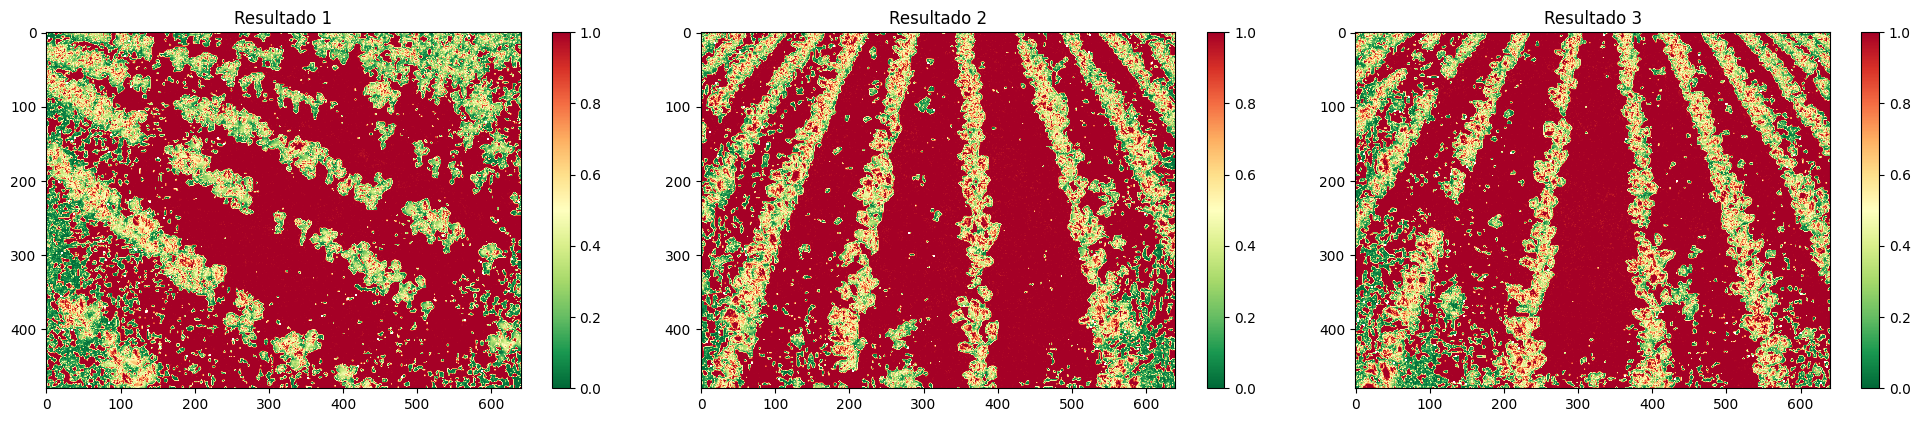


Área de Biomassa (Imagem 1): 211696 pixels;
Área de Solo Exposto (Imagem 1): 95429 pixels.

Área de Biomassa (Imagem 2): 228267 pixels;
Área de Solo Exposto (Imagem 2): 78880 pixels.

Área de Biomassa (Imagem 3): 225573 pixels;
Área de Solo Exposto (Imagem 3): 81553 pixels.

A imagem 1 é diferente da imagem 2;
A imagem 2 é diferente da imagem 3;
A imagem 3 é diferente da imagem 1.


In [23]:
image1_path = "/content/drive/MyDrive/Colab Notebooks/1_input/image1.jpg" ## Modifique a ordem e misture as imagens para testar o script
image2_path = "/content/drive/MyDrive/Colab Notebooks/1_input/image2.jpg" ## Modifique a ordem e misture as imagens para testar o script
image3_path = "/content/drive/MyDrive/Colab Notebooks/1_input/image3.jpg" ## Modifique a ordem e misture as imagens para testar o script

gli(image1_path, image2_path, image3_path)